# ANALYSIS OF AUTISM ASSOCIATED GENE; GENBANK CODE: BC031413

# ABAT 4-aminobutyrate aminotransferase [ Homo sapiens (human) ]
Gene ID: 18, updated on 29-Jul-2024


Chromosome Band -
16p13.2 

In [22]:
import os
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

fasta_directory = "/home/tbkhori_/Desktop/LockJaw/bio/FASTA_Files/ABAT_datasets/ncbi_dataset/data"

# Check if the directory exists
if not os.path.exists(fasta_directory):
    print(f"Error: The directory '{fasta_directory}' does not exist.")
else:
    fasta_files_found = False
    for filename in os.listdir(fasta_directory):
        if filename.endswith((".fasta", ".fa", ".fna" , ".faa")):  # Correct use of endswith with tuple
            filepath = os.path.join(fasta_directory, filename)
            try:
                for sequence_record in SeqIO.parse(filepath, "fasta"):
                    gc_content = gc_fraction(sequence_record.seq) * 100  # Convert to percentage
                    print(f"GC content of {filename} - {sequence_record.id}: {gc_content:.2f}%")
                    fasta_files_found = True
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    if not fasta_files_found:
        print("No FASTA files were found or processed in the specified directory.")

GC content of gene.fna - NC_000016.10:8674617-8784570: 47.34%
GC content of gene.fna - NC_060940.1:8707289-8817330: 47.32%
GC content of rna.fna - XM_047433688.1: 47.18%
GC content of rna.fna - NM_001386602.1: 49.84%
GC content of rna.fna - NM_001386615.1: 49.87%
GC content of rna.fna - NM_020686.6: 49.74%
GC content of rna.fna - NM_001386609.1: 49.73%
GC content of rna.fna - NM_001386605.1: 49.83%
GC content of rna.fna - NM_001386607.1: 49.64%
GC content of rna.fna - NM_001386608.1: 49.62%
GC content of rna.fna - NM_001386610.1: 49.83%
GC content of rna.fna - NM_001386614.1: 49.92%
GC content of rna.fna - NM_001386611.1: 49.34%
GC content of rna.fna - NM_001386612.1: 49.23%
GC content of rna.fna - NM_001386603.1: 49.92%
GC content of rna.fna - NM_001386600.1: 50.39%
GC content of rna.fna - XM_047433687.1: 47.38%
GC content of rna.fna - NM_001386604.1: 50.03%
GC content of rna.fna - XM_047433685.1: 47.65%
GC content of rna.fna - XM_047433686.1: 47.28%
GC content of rna.fna - NM_000663.

ABAT Gene Information (GenBank: BC031413):
Sequence Length: 1757 bp
GC Content: 53.73%

Features:
Type: gene
Location: [0:1757](+)

Type: CDS
Location: [118:1621](+)
Product: 4-aminobutyrate aminotransferase
Protein Length: 500 amino acids

CDS Sequence: ATGGCCTCCATGTTGCTCGCCCAGCGCCTGGCCTGCAGCTTCCAGCACAG... (first 50 bp)
CDS Length: 1503 bp


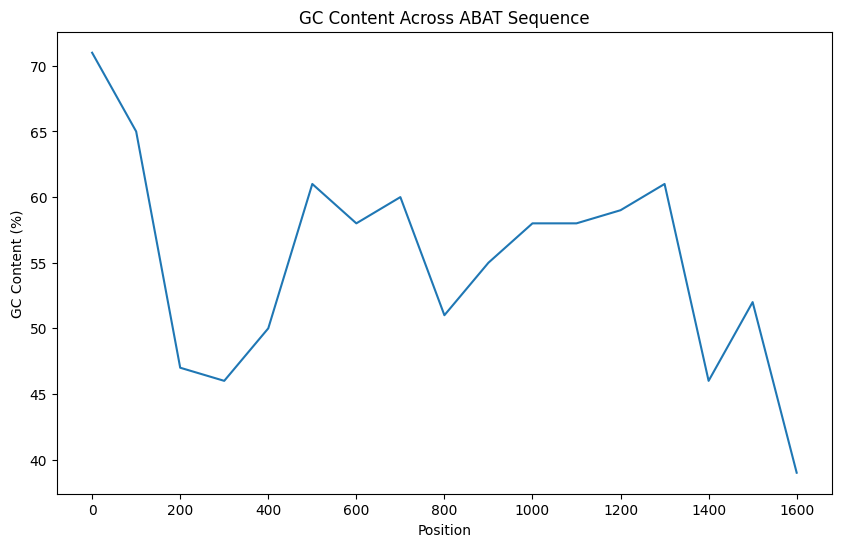


First 10 bases: GCCGGAACTC
Last 10 bases: AAAAAAAAAA


In [36]:
from Bio import Entrez, SeqIO
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt


Entrez.email = "q713cc5x5@mozmail.com"

def fetch_genbank_record(accession):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    return record

# Fetch the ABAT record
abat_record = fetch_genbank_record("BC031413")

print(f"ABAT Gene Information (GenBank: BC031413):")
print(f"Sequence Length: {len(abat_record.seq)} bp")
print(f"GC Content: {gc_fraction(abat_record.seq)*100:.2f}%")

# Print feature information
print("\nFeatures:")
for feature in abat_record.features:
    if feature.type == "gene" or feature.type == "CDS":
        print(f"Type: {feature.type}")
        print(f"Location: {feature.location}")
        if "product" in feature.qualifiers:
            print(f"Product: {feature.qualifiers['product'][0]}")
        if "translation" in feature.qualifiers:
            print(f"Protein Length: {len(feature.qualifiers['translation'][0])} amino acids")
        print()

# Extract CDS sequence if available
cds_feature = next((f for f in abat_record.features if f.type == "CDS"), None)
if cds_feature:
    cds_seq = cds_feature.extract(abat_record.seq)
    print(f"CDS Sequence: {cds_seq[:50]}... (first 50 bp)")
    print(f"CDS Length: {len(cds_seq)} bp")

# Plot GC content across the sequence
window_size = 100
gc_content = []
for i in range(0, len(abat_record.seq) - window_size, window_size):
    window = abat_record.seq[i:i+window_size]
    gc_content.append(gc_fraction(window) * 100)

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(gc_content)*window_size, window_size), gc_content)
plt.title("GC Content Across ABAT Sequence")
plt.xlabel("Position")
plt.ylabel("GC Content (%)")
plt.show()

# Print the first 10 and last 10 bases of the sequence
print(f"\nFirst 10 bases: {abat_record.seq[:10]}")
print(f"Last 10 bases: {abat_record.seq[-10:]}")

In [23]:
pip install numpy==1.23.5

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
    pyparsing>=2.4*
             ~~~~~^
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



# Aliases
GABAT,  NPD009,  GABA-AT &  GABA 


# Autism Reports / Total Reports
3 / 8 


# Rare Variants / Common Variants
6 / 2


# Primary report


Barnby G, Abbott A, Sykes N, Morris A, Weeks DE, Mott R, Lamb J, Bailey AJ, Monaco AP; International Molecular Genetics Study of Autism Consortium. Candidate-gene screening and association analysis at the autism-susceptibility locus on chromosome 16p: evidence of association at GRIN2A and ABAT. Am J Hum Genet. 2005 Jun;76(6):950-66. doi: 10.1086/430454. Epub 2005 Apr 13. PMID: 15830322; PMCID: PMC1196454.

In the report and in the visual Human Gene associated with ASD via 'SFARI GENE Human Gene (H G) Scrubber'. The GRIN2A is mention and a quick analyisis of the 16 chromosome p13.2 overlay shows that it shares the position with ABAT before it & USP7.

# GRIN2A


Chromosome Band -
16p13.2 


# Aliases
NR2A & NMDAR2A 

# Associated Disorders
DD/NDD, ADHD, ID, EP, EPS, ASD

# Associated Syndromes
Pediatric Acute-Onset Neuropsychiatric Syndrome


# Genetic Category
Rare Single Gene Mutation, Syndromic, Genetic Association, Functional 

# USP7


Chromosome Band : 
16p13.2 


# Aliases
HAUSP & TEF1 


# Associated Syndromes
Hao-Fountain Syndrome, ADHD, DD, ID, Hao-Fountain syndrome, Hao-Fountain syndrome, DD 


# Associated Disorders
ADHD, ASD, EPS 

In [ ]:
from Bio import Entrez
import xml.etree.ElementTree as ET

Entrez.email = "q713cc5x5@mozmail.com"

def fetch_gene_location(gene_name):
    handle = Entrez.esearch(db="gene", term=f"{gene_name}[Gene Name] AND homo sapiens[Organism]")
    record = Entrez.read(handle)
    handle.close()

    if record["Count"] == "0":
        return None

    gene_id = record["IdList"][0]
    handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
    xml_data = handle.read()
    handle.close()

    root = ET.fromstring(xml_data)

    location = {}
    for elem in root.iter():
        if elem.tag == "Seq-interval_from":
            location["start"] = int(elem.text)
        elif elem.tag == "Seq-intervacentromere to telomerel_to":
            location["end"] = int(elem.text)
        elif elem.tag == "Maps_display-str":
            location["chromosome"] = elem.text

    if "start" in location and "end" in location and "chromosome" in location:
        return location
    else:
        return None

genes = ["ABAT", "USP7", "GRIN2A"]
locations = {}

for gene in genes:
    location = fetch_gene_location(gene)
    if location:
        locations[gene] = location
        print(f"{gene}: {location['chromosome']}, Start: {location['start']}, End: {location['end']}")
    else:
        print(f"Could not fetch location for {gene}")

# Calculate distances between genes
gene_pairs = [("ABAT", "USP7"), ("ABAT", "GRIN2A"), ("USP7", "GRIN2A")]
for gene1, gene2 in gene_pairs:
    if gene1 in locations and gene2 in locations:
        distance = abs(locations[gene1]["start"] - locations[gene2]["start"])
        print(f"Distance between {gene1} and {gene2}: {distance} base pairs")

# Proximity Confirmation:
- All three genes (ABAT, USP7, and GRIN2A) are located on chromosome 16p13.2.

# Relative Positions:
The order of genes from centromere to telomere is: USP7 -> GRIN2A -> ABAT

- Lower numbers are closer to the centromere

- Higher numbers are closer to the telomere

In [25]:
from Bio import Entrez, SeqIO

Entrez.email = "q713cc5x5@mozmail.com"

def fetch_genbank_record(gene_name):
    # Search for the gene
    handle = Entrez.esearch(db="gene", term=f"{gene_name}[Gene Name] AND homo sapiens[Organism]")
    record = Entrez.read(handle)
    handle.close()

    if record["Count"] == "0":
        return None

    gene_id = record["IdList"][0]

    # Fetch the gene details to get the genomic accession
    handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
    gene_record = Entrez.read(handle)
    handle.close()

    try:
        genomic_accession = gene_record[0]["Entrezgene_locus"][0]["Gene-commentary_accession"]
    except (KeyError, IndexError):
        print(f"Could not find genomic accession for {gene_name}")
        return None

    # Fetch the GenBank record
    handle = Entrez.efetch(db="nucleotide", id=genomic_accession, rettype="gb", retmode="text")
    genbank_record = SeqIO.read(handle, "genbank")
    handle.close()

    return genbank_record

genes = ["ABAT", "USP7", "GRIN2A"]

for gene in genes:
    record = fetch_genbank_record(gene)
    if record:
        print(f"{gene}:")
        print(f"Accession: {record.id}")
        print(f"Description: {record.description}")
        print(f"Sequence length: {len(record.seq)} bp")
        for feature in record.features:
            if feature.type == "gene" and feature.qualifiers.get("gene", [""])[0] == gene:
                location = feature.location
                print(f"Location: {location.start}..{location.end}")
        print("\n")
    else:
        print(f"Could not fetch GenBank record for {gene}\n")


ABAT:
Accession: NC_000016.10
Description: Homo sapiens chromosome 16, GRCh38.p14 Primary Assembly
Sequence length: 90338345 bp


USP7:
Accession: NC_000016.10
Description: Homo sapiens chromosome 16, GRCh38.p14 Primary Assembly
Sequence length: 90338345 bp


GRIN2A:
Accession: NC_000016.10
Description: Homo sapiens chromosome 16, GRCh38.p14 Primary Assembly
Sequence length: 90338345 bp




# Chromosome 16 Length
- The sequence length of 90,338,345 bp is the total length.
# Entire Chromosome 16 NC n.o
- The accession number NC_000016.10 (GRCh38.p14 (latest) human genome assembly)

In [26]:
from Bio import Entrez, SeqIO

Entrez.email = "q713cc5x5@mozmail.com"

def fetch_gene_info(gene_name):
    # Search for the gene
    handle = Entrez.esearch(db="gene", term=f"{gene_name}[Gene Name] AND homo sapiens[Organism]")
    record = Entrez.read(handle)
    handle.close()

    if record["Count"] == "0":
        return None

    gene_id = record["IdList"][0]

    # Fetch the gene details
    handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
    gene_record = Entrez.read(handle)
    handle.close()

    try:
        location = gene_record[0]["Entrezgene_locus"][0]["Gene-commentary_seqs"][0]["Seq-loc_int"]["Seq-interval"]
        start = int(location["Seq-interval_from"]) + 1  # Convert to 1-based coordinate
        end = int(location["Seq-interval_to"]) + 1  # Convert to 1-based coordinate
        strand = "+" if location["Seq-interval_strand"]["Na-strand"].attributes["value"] == "plus" else "-"
        return {
            "gene": gene_name,
            "chromosome": "chr16",
            "start": start,
            "end": end,
            "strand": strand,
            "length": end - start + 1
        }
    except (KeyError, IndexError):
        print(f"Could not find location information for {gene_name}")
        return None

genes = ["ABAT", "USP7", "GRIN2A"]

gene_info = {}
for gene in genes:
    info = fetch_gene_info(gene)
    if info:
        gene_info[gene] = info
        print(f"{gene}:")
        print(f"Location: {info['chromosome']}:{info['start']}-{info['end']} ({info['strand']})")
        print(f"Length: {info['length']} bp")
        print()

# Calculate distances between genes
gene_pairs = [("ABAT", "USP7"), ("ABAT", "GRIN2A"), ("USP7", "GRIN2A")]
for gene1, gene2 in gene_pairs:
    if gene1 in gene_info and gene2 in gene_info:
        distance = abs(gene_info[gene1]["start"] - gene_info[gene2]["start"])
        print(f"Distance between {gene1} and {gene2}: {distance:,} bp")

ABAT:
Location: chr16:8674617-8784570 (+)
Length: 109954 bp

USP7:
Location: chr16:8892097-8963906 (-)
Length: 71810 bp

GRIN2A:
Location: chr16:9753404-10182908 (-)
Length: 429505 bp

Distance between ABAT and USP7: 217,480 bp
Distance between ABAT and GRIN2A: 1,078,787 bp
Distance between USP7 and GRIN2A: 861,307 bp


# Gene Orientations:

- ABAT is on the + strand, while USP7 and GRIN2A are on the - strand.

- The orientation difference has potential to show relevance required to understand their regulation and potential interactions.

# Gene Sizes:

- GRIN2A is significantly larger than ABAT and USP7, which might indicate a more complex gene structure or regulation.

# Potential Implications for ASD Research:

The proximity of ABAT and USP7 might suggest a functional relationship. Given USP7's known association with neurodevelopmental disorders, investigating potential interactions or co-regulation with ABAT 

# Research Directions:

Gene Expression Correlation:

- Analyze expression data to see if ABAT and USP7 show correlated expression patterns in different tissues or developmental stages.

In [27]:
pip install --upgrade pandas numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
    pyparsing>=2.4*
             ~~~~~^
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# This is a placeholder for actual data fetching
# In reality, you'd need to access these databases through their APIs or download the data

def fetch_expression_data(gene1, gene2):
    # Placeholder function
    # Replace with actual data fetching from GTEx, BrainSpan, etc.
    tissues = ['brain', 'liver', 'heart', 'lung']
    gene1_exp = np.random.rand(len(tissues))
    gene2_exp = np.random.rand(len(tissues))
    return pd.DataFrame({'tissue': tissues, gene1: gene1_exp, gene2: gene2_exp})

data = fetch_expression_data('ABAT', 'USP7')

# Api issues with GTEX Portal - GTEx Biobank

In [29]:
def analyze_correlation(data, gene1, gene2):
    correlation, p_value = stats.pearsonr(data[gene1], data[gene2])
    print(f"Correlation between {gene1} and {gene2}: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
    return correlation, p_value

correlation, p_value = analyze_correlation(data, 'ABAT', 'USP7')

Correlation between ABAT and USP7: -0.925
P-value: 0.075


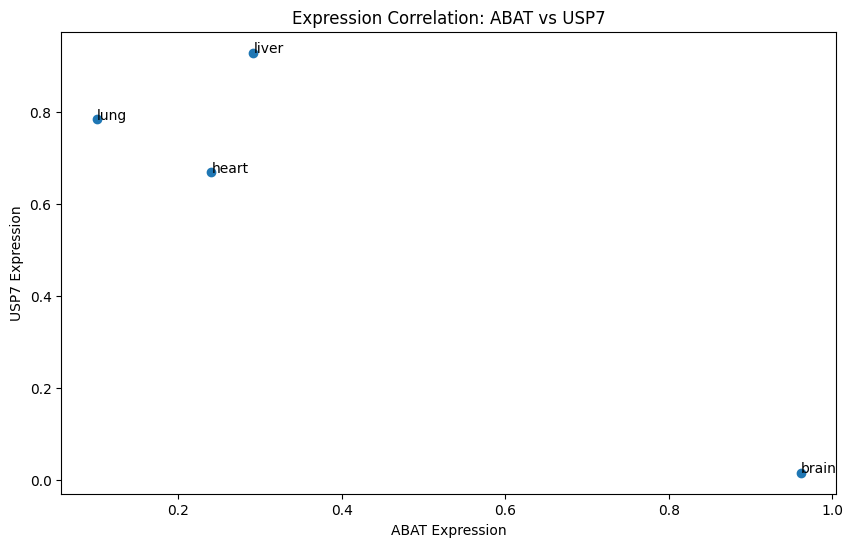

In [30]:
def plot_expression(data, gene1, gene2):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[gene1], data[gene2])
    plt.xlabel(gene1 + ' Expression')
    plt.ylabel(gene2 + ' Expression')
    plt.title(f'Expression Correlation: {gene1} vs {gene2}')
    for i, tissue in enumerate(data['tissue']):
        plt.annotate(tissue, (data[gene1][i], data[gene2][i]))
    plt.show()

plot_expression(data, 'ABAT', 'USP7')

# Pseudo sample data used for testing.

Correlation: 0.901


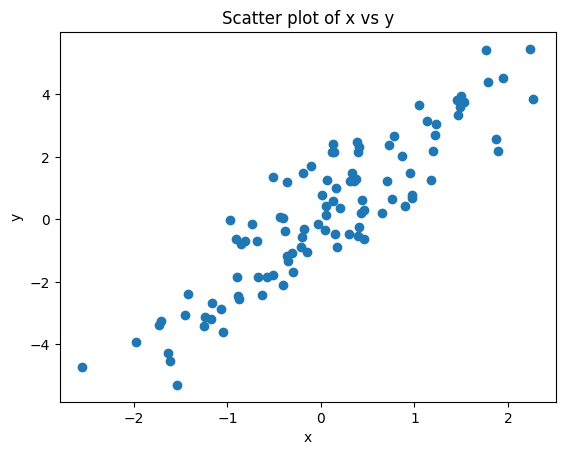

In [31]:
import numpy as np

# Generate some random data
np.random.seed(0)
x = np.random.randn(100)
y = 2*x + np.random.randn(100)

# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]

print(f"Correlation: {correlation:.3f}")

# matplotlib  dense scater plot test
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
import io

# URL for GTEx v8 median TPM by tissue dataset
url = "https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    # Read the gzipped file directly into a pandas DataFrame
    data = pd.read_csv(io.BytesIO(response.content), compression='gzip', sep='\t', skiprows=2)
    
    # Set the 'Name' column (containing Ensembl IDs) as the index
    data.set_index('Name', inplace=True)
    
    # Extract data for ABAT and USP7
    abat_data = data.loc['ENSG00000183044.17']
    usp7_data = data.loc['ENSG00000187555.14']
    
    # Combine the data
    combined_data = pd.DataFrame({'ABAT': abat_data, 'USP7': usp7_data})
    
    # Remove any rows with missing data
    combined_data.dropna(inplace=True)
    
    # Calculate correlation
    correlation, p_value = stats.pearsonr(combined_data['ABAT'], combined_data['USP7'])
    print(f"Correlation between ABAT and USP7 expression: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
    
    # Plot the data
    plt.figure(figsize=(12, 8))
    plt.scatter(combined_data['ABAT'], combined_data['USP7'])
    plt.xlabel('ABAT Expression (TPM)')
    plt.ylabel('USP7 Expression (TPM)')
    plt.title('Expression Correlation: ABAT vs USP7 across GTEx tissues')
    
    # Annotate some points
    for i, tissue in enumerate(combined_data.index):
        if i % 5 == 0:  # Annotate every 5th point to avoid overcrowding
            plt.annotate(tissue, (combined_data['ABAT'][i], combined_data['USP7'][i]), fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print top 10 tissues with highest expression for each gene
    print("\nTop 10 tissues with highest ABAT expression:")
    print(combined_data.sort_values('ABAT', ascending=False)['ABAT'].head(10))
    
    print("\nTop 10 tissues with highest USP7 expression:")
    print(combined_data.sort_values('USP7', ascending=False)['USP7'].head(10))
else:
    print("Failed to download the dataset")

Failed to download the dataset


Functional Interactions:

- Investigate potential protein-protein interactions or shared pathways involving ABAT, USP7, and GRIN2A products.

# Note

Potential Functional Relationships:

- The ordering of genes involved in protein deubiquitination (USP7), glutamate signaling (GRIN2A), and GABA metabolism (ABAT) might suggest a functional cascade or interrelated processes relevant to neurodevelopment and ASD